In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes


In [97]:
bunch_diabetes = load_diabetes()
#leyendo docu, load_diabetes no devuelve un df, sino como un bunch,
#entonces por eso 'bunch'

In [98]:
x = bunch_diabetes.data[:,2].reshape(-1,1)
y = bunch_diabetes.target

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [100]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
y_pred = regressor.predict(X_test)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', regressor.coef_)
print('Independet term: \n', regressor.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))

Coefficients: 
 [1013.17358257]
Independet term: 
 153.43509039227231
Mean squared error: 3921.37


In [103]:
print(regressor.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

0.23132831307953805
Variance score: 0.23


Text(0.5, 0.98, 'Linear Regression Model')

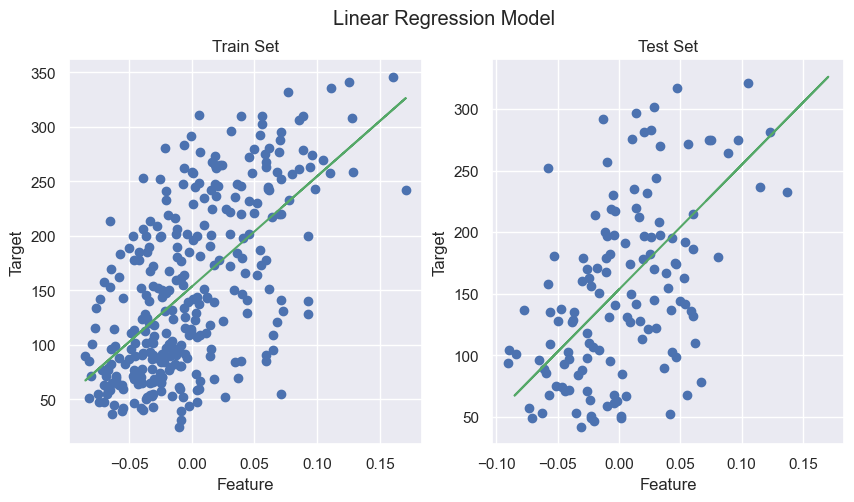

In [104]:

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train,regressor.predict(X_train), c='g')
ax[0].set_title('Train Set')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Target')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Test Set')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Target')
plt.suptitle('Linear Regression')

plt.suptitle('Linear Regression Model')


## Segunda forma
Al estar investigando porque este metodo no nos daba los mismos resultados que los solicitados en la tarea, unos compañeros y yo nos pusimos a buscar posibilidades del por que, al estar buscando en internet encontramos el problema y nos dimos cuenta que los resultados cambiaban porque el data set usado para obtener los resultados pedidos se conformaba de 20 datos especificos tanto para el training set como para el testing set

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data_diabetes = load_diabetes()
x2 = data_diabetes.data[:, 2].reshape(-1, 1)
y2 = data_diabetes.target

X2_train = x2[:-20]
X2_test = x2[-20:]

Y2_train = y2[:-20]
Y2_test = y2[-20:]

model_regressor = LinearRegression()
model_regressor.fit(X2_train, Y2_train)

y2_pred = model_regressor.predict(X2_test)

print('Coefficients:\n', model_regressor.coef_)
print('Independent term:\n', model_regressor.intercept_)
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(Y2_test, y2_pred))
print('Variance score: %.2f' % r2_score(Y2_test, y2_pred))

Coefficients:
 [938.23786125]
Independent term:
 152.91886182616113
Mean Squared Error (MSE): 2548.07
Variance score: 0.47


Text(0.5, 0.98, 'Linear Regression')

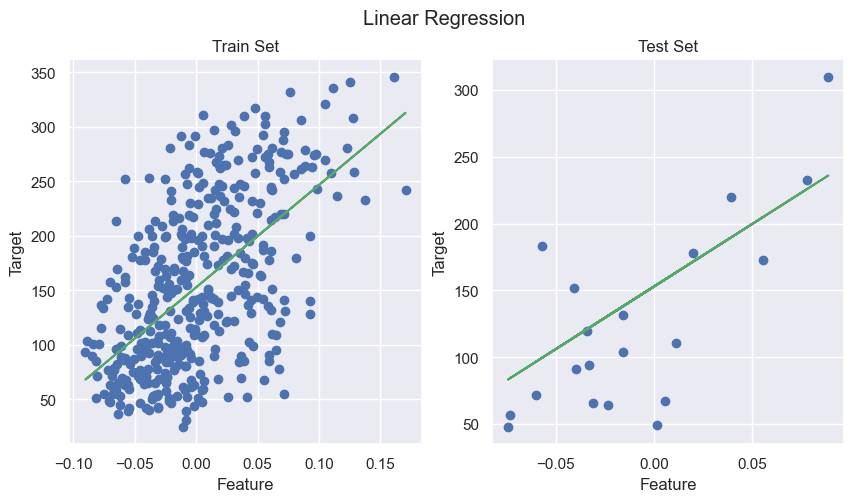

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X2_train, Y2_train)
ax[0].plot(X2_train, model_regressor.predict(X2_train), c='g')
ax[0].set_title('Train Set')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Target')
ax[1].scatter(X2_test, Y2_test)
ax[1].plot(X2_test, model_regressor.predict(X2_test), c='g')
ax[1].set_title('Test Set')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Target')
plt.suptitle('Linear Regression')

## Conclusion
A partir del análisis realizado, se observa que existe una relación positiva entre el índice de masa corporal (BMI) y la progresión de la enfermedad de la diabetes. El modelo de regresión lineal simple logra capturar esta tendencia general, como lo indica el valor obtenido del coeficiente de determinación r2, lo que sugiere que la variable BMI explica una parte significativa de la variabilidad en la variable objetivo.

Sin embargo, el valor del error cuadrático medio (MSE) indica que el modelo aún presenta un margen de error considerable, lo cual es esperable al utilizar una única variable independiente. Esto sugiere que, si bien el BMI es un factor relevante, no es suficiente por sí solo para explicar completamente la progresión de la enfermedad, por lo que sería conveniente incorporar más variables para mejorar la precisión del modelo.
